In [1]:
import numpy as np
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import string
import pandas as pd
from matplotlib import pylab as plt

class CLF(MLPClassifier):
    def __init__(self, alpha=0.0001):
        super().__init__(hidden_layer_sizes=(50, 50, 50), 
                                  activation='relu', 
                                  solver='adam', 
                                  alpha=alpha, # hyperparameter
                                  batch_size='auto', 
                                  learning_rate_init=5e-4, 
                                  verbose=True,
                                  early_stopping=True, 
                                  validation_fraction=0.1, 
                                  beta_1=0.9, 
                                  beta_2=0.999, 
                                  n_iter_no_change=5)

In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn

class FileReader():
    def __init__(self, train, test, tfidf=True, lemmatize=False):
        df = pd.read_csv(train)
        self.train_text = df['text']
        self.train_label = df['label']
        df = pd.read_csv(test)
        self.test_id = df['id']
        self.test_text = df['text']
        self.tfidf = tfidf
        self.stop_words = set(stopwords.words('english') + list(string.punctuation) \
                             + ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'])
        if lemmatize:
            def tokenizer(text):
                def is_noun(tag):
                    return tag in ['NN', 'NNS', 'NNP', 'NNPS']
                def is_verb(tag):
                    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
                def is_adverb(tag):
                    return tag in ['RB', 'RBR', 'RBS']
                def is_adjective(tag):
                    return tag in ['JJ', 'JJR', 'JJS']
                def penn_to_wn(tag):
                    if is_adjective(tag):
                        return wn.ADJ
                    elif is_noun(tag):
                        return wn.NOUN
                    elif is_adverb(tag):
                        return wn.ADV
                    elif is_verb(tag):
                        return wn.VERB
                    return wn.NOUN
                lemmatizer = WordNetLemmatizer()
                tokens = (word for word in nltk.word_tokenize(text) if len(word) > 1 and word not in self.stop_words and not word.isnumeric())
                token_pos = nltk.pos_tag(tokens)
                lemmas = (lemmatizer.lemmatize(item, penn_to_wn(pos)) for item, pos in token_pos)
                return lemmas
            self.tokenizer = tokenizer
        else:
            self.tokenizer = None
            
    def getLabel(self):
        return self.train_label
    
    def getTestId(self):
        return self.test_id
    
    def genMatrix(self, ngram=(1, 1)):
        Vectorizer = TfidfVectorizer if self.tfidf else CountVectorizer
        v = Vectorizer(stop_words=self.stop_words, ngram_range=ngram, lowercase=True, \
                                   min_df=3, max_df=0.999, use_idf=False, tokenizer=self.tokenizer)
        train_data_matrix = v.fit_transform(self.train_text)
        vv = Vectorizer(stop_words=self.stop_words, ngram_range=ngram, lowercase=True, \
                                  vocabulary=v.vocabulary_, use_idf=False, tokenizer=self.tokenizer)
        test_data_matrix = vv.transform(self.test_text)
        return train_data_matrix, test_data_matrix, v.vocabulary_
    
# Reading files and generating data matrices
print('Reading files...')
fr = FileReader('data/train.csv', 'data/test.csv', lemmatize=False)
print('Generating matrices...')
train_data_matrix, test_data_matrix, vocab = fr.genMatrix(ngram=(1,5))
train_label, test_id = fr.getLabel(), fr.getTestId()
print('Train:', train_data_matrix.shape, train_label.shape)
print('Vocab:', len(vocab))
print('Test:', test_data_matrix.shape, test_id.shape)

Reading files...
Generating matrices...
Train: (16000, 123770) (16000,)
Vocab: 123770
Test: (4491, 123770) (4491,)


{'alpha': 0.001}
Iteration 1, loss = 1.56240527
Validation score: 0.343750
Iteration 2, loss = 1.53480661
Validation score: 0.343750
Iteration 3, loss = 1.50747462
Validation score: 0.343750
Iteration 4, loss = 1.47893641
Validation score: 0.343750
Iteration 5, loss = 1.44562278
Validation score: 0.343750
Iteration 6, loss = 1.40714830
Validation score: 0.351562
Iteration 7, loss = 1.36202679
Validation score: 0.343750
Iteration 8, loss = 1.30911379
Validation score: 0.335938
Iteration 9, loss = 1.24852772
Validation score: 0.359375
Iteration 10, loss = 1.17881577
Validation score: 0.367188
Iteration 11, loss = 1.10003709
Validation score: 0.390625
Iteration 12, loss = 1.01272674
Validation score: 0.406250
Iteration 13, loss = 0.91824066
Validation score: 0.398438
Iteration 14, loss = 0.81942133
Validation score: 0.406250
Iteration 15, loss = 0.71824101
Validation score: 0.406250
Iteration 16, loss = 0.61779403
Validation score: 0.421875
Iteration 17, loss = 0.52027024
Validation score

Iteration 8, loss = 0.19390666
Validation score: 0.596591
Iteration 9, loss = 0.11011831
Validation score: 0.592330
Iteration 10, loss = 0.05923742
Validation score: 0.596591
Iteration 11, loss = 0.03464539
Validation score: 0.589489
Iteration 12, loss = 0.02359404
Validation score: 0.582386
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
Iteration 1, loss = 1.45297082
Validation score: 0.420363
Iteration 2, loss = 1.26881103
Validation score: 0.497984
Iteration 3, loss = 0.97026808
Validation score: 0.566532
Iteration 4, loss = 0.66099974
Validation score: 0.577621
Iteration 5, loss = 0.41304747
Validation score: 0.585685
Iteration 6, loss = 0.25887708
Validation score: 0.589718
Iteration 7, loss = 0.17936063
Validation score: 0.603831
Iteration 8, loss = 0.13499091
Validation score: 0.604839
Iteration 9, loss = 0.09750200
Validation score: 0.602823
Iteration 10, loss = 0.05872866
Validation score: 0.594758
Iteration 11, loss = 0.03184612
Va

C:\Users\mcreng\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\mcreng\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\mcreng\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


AttributeError: 'CLF' object has no attribute '_best_coefs'

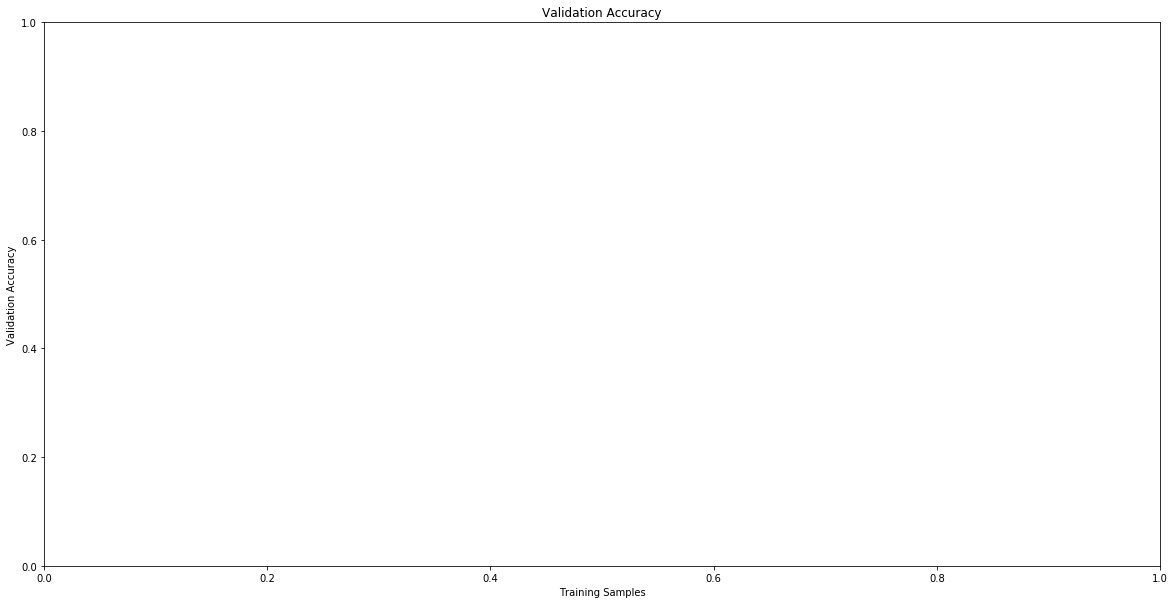

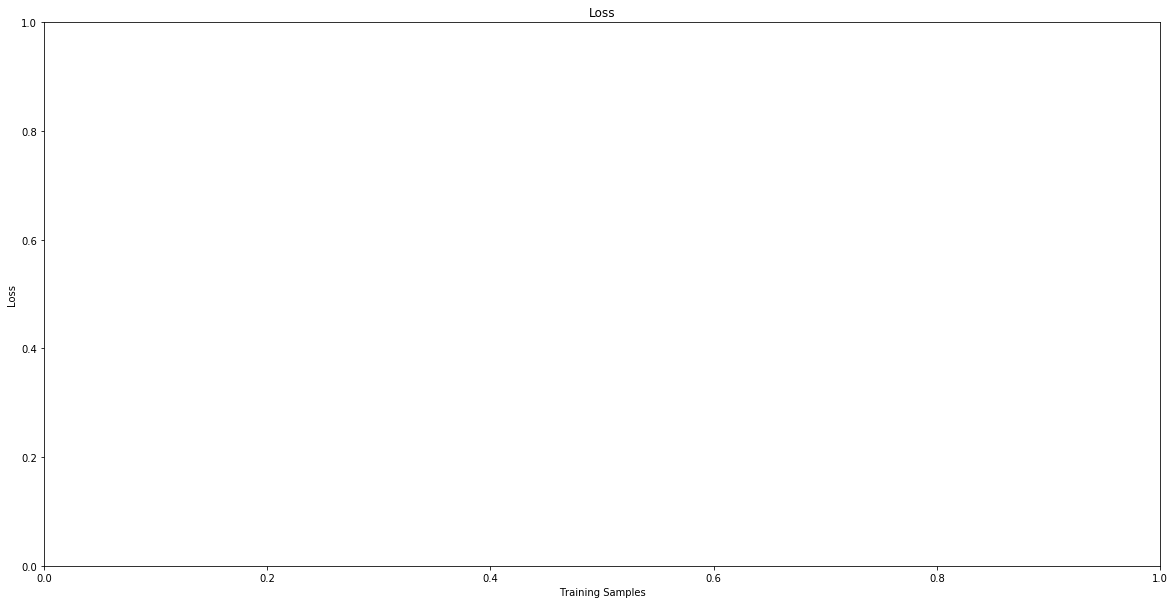

In [11]:
from sklearn.model_selection import learning_curve
"""
    Format: <variable name>: (<min>, <max>, <use logscale>)
"""
hyperparam_dict = {
#     'alpha': (-5, 0, True)
    'alpha': (1e-3, 1e-3, False)
}

best_hyperparams = {}
best_acc = -1
best_clf = None

plt.figure(0, figsize=(20, 10))
plt.title('Validation Accuracy')
plt.xlabel('Training Samples')
plt.ylabel('Validation Accuracy')
plt.figure(1, figsize=(20, 10))
plt.title('Loss')
plt.xlabel('Training Samples')
plt.ylabel('Loss')


accuracies = {}
for _ in range(1):
    hyperparams = dict(zip(hyperparam_dict.keys(), 
                           [10**np.random.uniform(minimum, maximum) if logscale 
                            else np.random.uniform(minimum, maximum) 
                            for minimum, maximum, logscale in hyperparam_dict.values()]))
    print(hyperparams)
    clf = CLF(**hyperparams)
    
    train_sizes, train_scores, valid_scores = learning_curve(CLF(**hyperparams),
                                                             train_data_matrix, train_label,
                                                             cv=5)
    
    if max(clf.best_validation_score_) > best_acc:
        best_hyperparams = hyperparams
        best_acc = clf.best_validation_score_
        best_clf = clf
        
print('Best result:', best_acc, 'at', best_hyperparams)

In [10]:
clf.best_validation_score_
clf.validation_scores_

[]

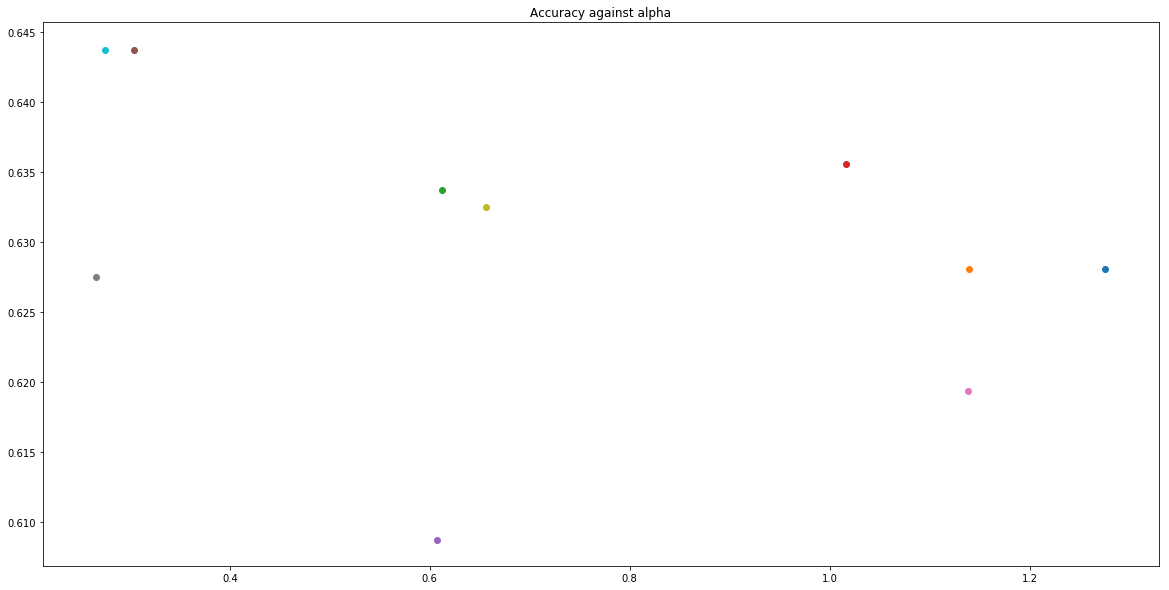

In [44]:
import ast

for k, v in accuracies.items():
    params = ast.literal_eval(k)
    for i in range(len(params)):
        plt.figure(i, figsize=(20, 10))
        plt.title('Accuracy against ' + list(params.keys())[i])
        plt.scatter(list(params.values())[i], v)
plt.show()

In [18]:
test_data_pre = best_clf.predict(test_data_matrix)

sub_df = pd.DataFrame()
sub_df["id"] = test_id
sub_df["pred"] = test_data_pre
sub_df.to_csv("submission-mlp.csv", index=False)
print('Saved prediction.')

Saved prediction.
